<a href="https://colab.research.google.com/github/fortune-uwha/DSN---Titanic-project/blob/master/135.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Module 1: Data Science Fundamentals

## Sprint 3: Intro to Modeling

## Spotify Challenge

<div><img style="width: 100%; " src="https://upload.wikimedia.org/wikipedia/commons/1/14/Iyyaka_Nastain_QR-Code_Spotify_Black.png" /></div>

## Background

For our sprint's project, we'll analyze some popular songs from Spotify. The dataset contains a number of variables that describe the songs, which we'll use to predict which genre it belongs to. 

---------

## How to start?

Download the dataset [from Kaggle](https://www.kaggle.com/insiyeah/musicfeatures) (`data.csv`) and read it. You should start by performing basic EDA on it. Afterwards, follow the requirements.

## Concepts to explore

We will use dimensionality reduction, do some clustering with K-means and perform modeling using logistic regression.

Look into the follow concepts, which will help you when modelling:
- [StandardScaler](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html)
- [LabelEncoding](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.LabelEncoder.html)
- [Accuracy](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html)

## Requirements

* Perform basic EDA.
* Perform dimensionality reduction on song features, verify data separability by genre (PCA and/or t-SNE).
* Infer genre using song features with logistic regression.
* Cluster songs by features. Generate lists of 5 of similar songs. Verify their similarity by actually listening to some of cluster items on Youtube / Spotify / any other streaming platform.

## Evaluation Criteria

- PCA/TSNE performed correctly and results analyzed
- Clustering done correctly and results analyzed
- Adherence to the requirements
- Model trained on given data and its performance evaluated
- Code quality


## Sample correction questions

During a correction, you may get asked questions that test your understanding of covered topics.

- What does a PCA do? How are principal components selected?
- Explain linear regression. What are the main assumptions of linear regression?
- What is K-means clustering? How does it work?
- When would you prefer T-SNE over. PCA?

#### Introduction
This dataset consists of 1000 audio tracks each 30 seconds long. It contains 10 genres, each represented by 100 tracks. 

Objective:
Train a model and know to which genre your favourite piece of music belong to. I'll try to find similar songs using attributes from the dataset

In [39]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.decomposition import PCA
plt.style.use('ggplot')
sns.set_palette("GnBu_d")
sns.set_style('whitegrid')

In [16]:
music = pd.read_csv('data.csv')
music.head()

,filename,tempo,beats,chroma_stft,rmse,spectral_centroid,spectral_bandwidth,rolloff,zero_crossing_rate,mfcc1,mfcc2,mfcc3,mfcc4,mfcc5,mfcc6,mfcc7,mfcc8,mfcc9,mfcc10,mfcc11,mfcc12,mfcc13,mfcc14,mfcc15,mfcc16,mfcc17,mfcc18,mfcc19,mfcc20,label
0,blues.00081.au,103.359375,50,0.380260,0.248262,2116.942959,1956.611056,4196.107960,0.127272,-26.929785,107.334008,-46.809993,40.932634,-21.463776,24.816275,-18.945571,15.253459,-15.050104,12.262823,-15.234050,14.336612,-13.821769,7.562789,-6.181372,0.330165,-6.829571,0.965922,-7.570825,2.918987,blues
1,blues.00022.au,95.703125,44,0.306451,0.113475,1156.070496,1497.668176,2170.053545,0.058613,-233.860772,136.170239,3.289490,48.931193,8.699106,13.954752,5.359449,0.381334,-13.490265,16.871769,5.145258,-2.250578,3.959198,5.322555,0.812028,-1.107202,-4.556555,-2.436490,3.316913,-0.608485,blues
2,blues.00031.au,151.999081,75,0.253487,0.151571,1331.073970,1973.643437,2900.174130,0.042967,-221.802549,110.843070,18.620984,30.922996,3.291330,22.587447,-20.418303,12.120995,-26.347956,-4.356270,-26.406674,-13.037723,-12.652228,-1.821905,-7.260097,-6.660252,-14.682694,-11.719264,-11.025216,-13.387260,blues
3,blues.00012.au,184.570312,91,0.269320,0.119072,1361.045467,1567.804596,2739.625101,0.069124,-207.208080,132.799175,-15.438986,60.986727,0.725807,12.437828,1.183836,-1.540779,-17.888154,8.358496,-2.452068,-0.613248,0.384877,2.605128,-5.188924,-9.527455,-9.244394,-2.848274,-1.418707,-5.932607,blues
4,blues.00056.au,161.499023,74,0.391059,0.137728,1811.076084,2052.332563,3927.809582,0.075480,-145.434568,102.829023,-12.517677,56.993472,2.271347,26.591402,-4.274803,17.338809,-7.985593,15.235427,-6.934599,7.457218,-10.470444,-2.360483,-6.783623,2.671134,-4.760879,-0.949005,0.024832,-2.005315,blues


In [17]:
music.shape

(1000, 30)

#### Exploratory Data Analysis
We would do some EDA now to see what kind of relationship we have between our features

In [18]:
#the genres are equally represented
music['label'].value_counts()

classical    100
jazz         100
reggae       100
country      100
blues        100
rock         100
hiphop       100
disco        100
metal        100
pop          100
Name: label, dtype: int64

NB - tempo is how fast or slow a piece of music is performed

Text(0, 0.5, 'Mean Tempo')

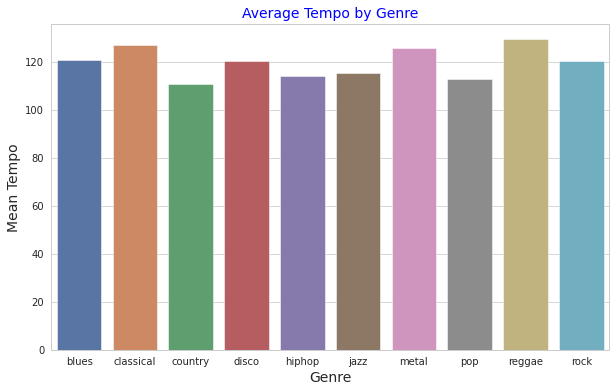

In [49]:
plt.figure(figsize=(10,6))

genres = music['label'].unique()

tempos = [music[music['label']==x].tempo.mean() for x in genres ]

sns.barplot(x=genres, y=tempos, palette="deep")

plt.title("Average Tempo by Genre", fontsize = 14, color='b')

plt.xlabel('Genre', fontsize = 14)
plt.ylabel('Mean Tempo', fontsize = 14)

Looking at the different genres, we can see that on average, they have the similar beats per minutes

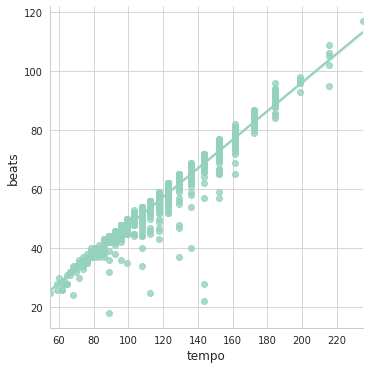

In [40]:
sns.lmplot(x='tempo',y='beats',data=music)

As expected, as the tempo go up, the beats increase as well.

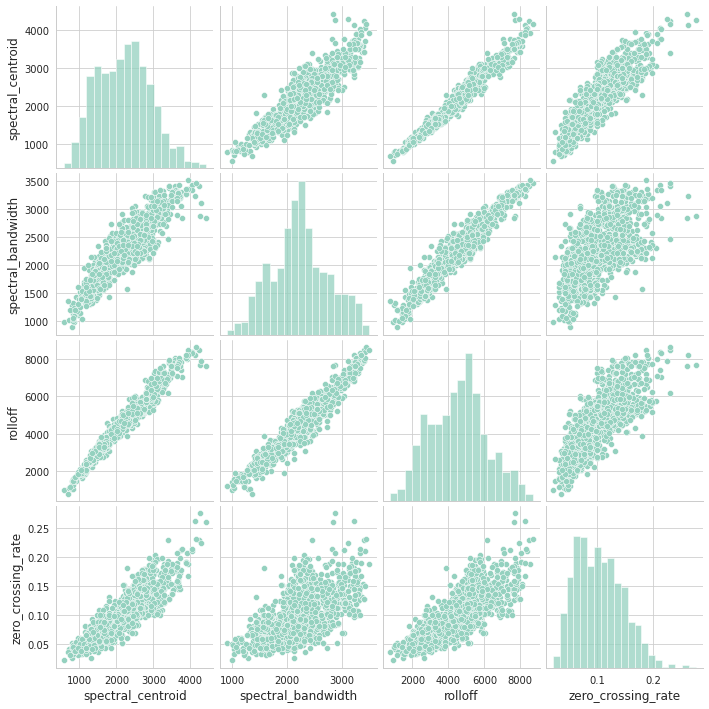

In [60]:
selected_features= music[['spectral_centroid', 'spectral_bandwidth', 'rolloff', 'zero_crossing_rate']]
sns.pairplot(selected_features)

There is a positive correlation between these features. Probably because they mostly dependent on frequencies.

#### Feature Scaling

Feature scaling through standardization (or Z-score normalization) can be an important preprocessing step for many machine learning algorithms. PCA is effected by scale so we need to scale the features in the data before applying PCA.

We will use `StandardScaler` to help standardize the dataset’s features onto unit scale (mean = 0 and SD = 1)

In [63]:
from sklearn.preprocessing import StandardScaler
features = music.iloc[:,1:29] 
# Separating out the features
x = music.loc[:, features].values
# Separating out the target
y = music.loc[:,['label']].values
# Standardizing the features
x = StandardScaler().fit_transform(x)

ValueError: ignored

####PCA
Principal Component Analysis (PCA) is a very useful technique that helps to understand the data, reduce dimensions of data and for unsupervised learning in general.

Now I will keep only the numeric features for PCA

In [62]:
features = music.iloc[:,1:29] 

In [21]:
pca = PCA(n_components = 3)
music_pca = pca.fit_transform(features)

Next, making a pandas data frame with the principal components (PCs) and the known cluster assignments.

In [29]:
pca_df = pd.DataFrame(data = music_pca , 
        columns = ['PC1', 'PC2','PC3'])
pca_df['Cluster'] = music['label']
pca_df.head()

,PC1,PC2,PC3,Cluster
0,-437.764309,194.339340,-70.976368,blues
1,-2724.658925,-2.261800,29.199490,blues
2,-1882.730034,-283.925766,58.805190,blues
3,-2125.187321,56.204873,-67.131142,blues
4,-770.057069,-73.147524,-70.060711,blues


In [30]:
pca.explained_variance_ratio_

array([0.98490406, 0.01064583, 0.00245375])

Let us now examine the variance explained by each principal component. We can clearly see that the first two principal components explains over 98% of the variation in the data.

Let us plot the variance explained by each principal component i.e a Scree plot.



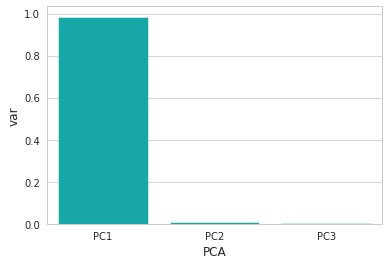

In [24]:
df = pd.DataFrame({'var':pca.explained_variance_ratio_,
             'PCA':['PC1','PC2','PC3']})
sns.barplot(x='PCA',y="var", 
           data=df, color="c");

Now we can use the top two principal components and make scatter plot. We will use Seaborn’s lmplot to make the PCA plot.

In [32]:
sns.relplot(x=pcaed[:, 0], y=pcaed[:, 1], hue=music.label, style=df.label, height=10, s=1000)

NameError: ignored

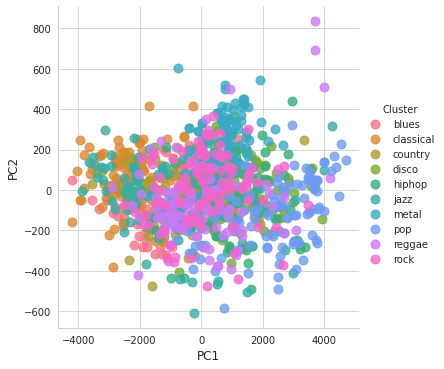

In [35]:
sns.lmplot( x="PC1", y="PC2",
  data=pca_df, 
  fit_reg=False, 
  hue='Cluster', # color by cluster
  legend=True,
  scatter_kws={"s": 80}) # specify the point size